# Example of single source-receiver measurement for ScS arrival, manually specifying input paramters

This example shows how the code can be applied to undertake shear-wave splitting analysis for an ScS arrival at one receiver.

Note: Here, event information such as S arrival time, ray back-azimuth and ray inclination are manually specified (see other examples for automatic passing of these parameters based on swspy or nonlinloc formats).

The data is from: 

J Asplet, J Wookey, M Kendall. (2020) "A potential post-perovskite province in D″ beneath the Eastern Pacific: evidence from new analysis of discrepant SKS–SKKS shear-wave splitting". GJI.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import swspy
import obspy
from obspy import UTCDateTime
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import glob 
import os, sys 
import pandas as pd

## Perform shear-wave splitting on event:

<IPython.core.display.Javascript object>


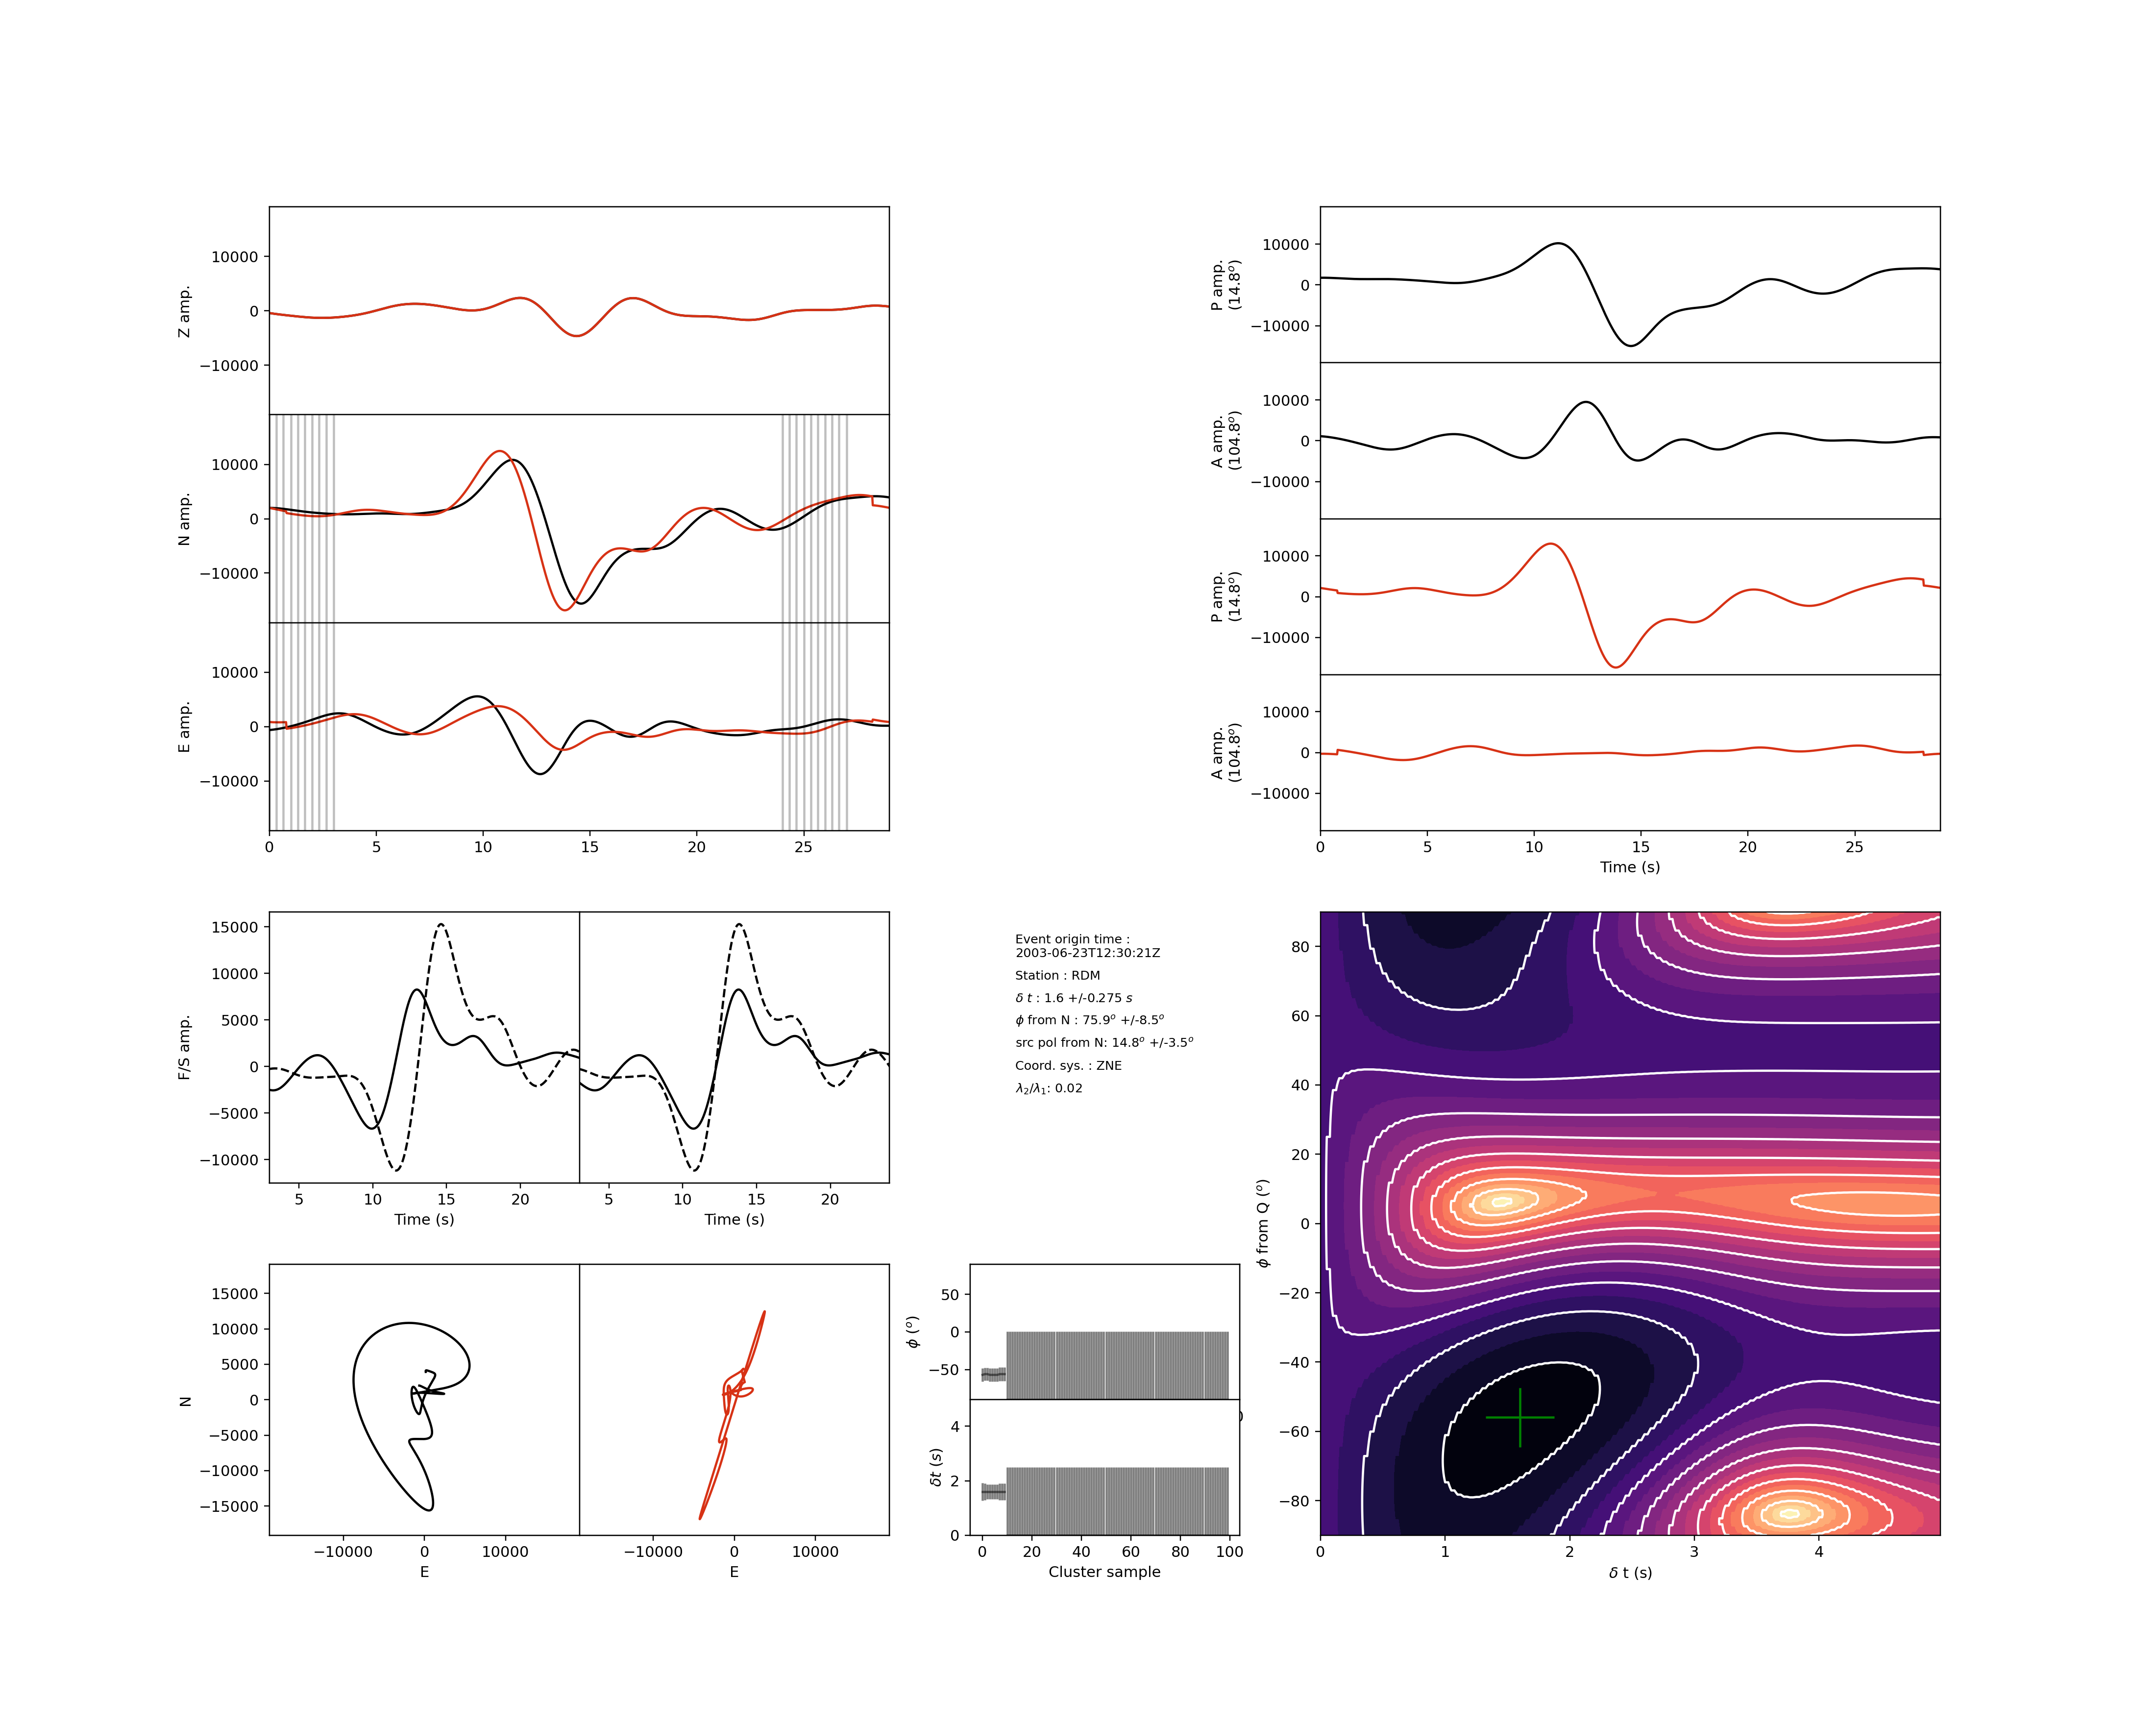

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:1654: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig(os.path.join(outdir, ''.join((self.event_uid, "_", station, ".png"))), dpi=300)


Saved sws result to: outputs/data/RDM_2003174_121231_ScS_sws_result.csv


In [5]:
# And get data for specific station:
station_to_analyse = "RDM"
event_uid = "RDM_2003174_121231_ScS"
S_wave_arrival_time = obspy.UTCDateTime("2003-06-23T12:31:20.000000Z")

# Manually specify key parameters:
stations_in = [station_to_analyse]
S_phase_arrival_times = [S_wave_arrival_time]
back_azis_all_stations = [311.86] # Back-azimuth from North
receiver_inc_angles_all_stations = [0.0] # Inclination angle of ray at station from vertical up (assume arriving with vertical incidence)
win_starttime = S_wave_arrival_time - 5
win_endtime = S_wave_arrival_time + 25 

# Load data:
mseed_path = os.path.join("data","splittingsample","data", event_uid+".*")
downsample_factor = 1 # Factor to downsample data by (for faster slitting)
load_wfs_obj = swspy.io.load_waveforms(mseed_path, archive_vs_file="file", downsample_factor=downsample_factor)
load_wfs_obj.filter = True
load_wfs_obj.filter_freq_min_max = [0.01, 0.5]
st = load_wfs_obj.read_waveform_data()

# Calculate splitting:
splitting_event = swspy.splitting.create_splitting_object(st, event_uid=event_uid, stations_in=stations_in, S_phase_arrival_times=S_phase_arrival_times, back_azis_all_stations=back_azis_all_stations, receiver_inc_angles_all_stations=receiver_inc_angles_all_stations) 
splitting_event.overall_win_start_pre_fast_S_pick = 4.0
splitting_event.win_S_pick_tolerance = 1.0
splitting_event.overall_win_start_post_fast_S_pick = (win_endtime - win_starttime) - 10 
splitting_event.rotate_step_deg = 1.0 
splitting_event.max_t_shift_s = 5.0
splitting_event.n_win = 10
splitting_event.perform_sws_analysis(coord_system="ZNE", sws_method="EV")

# And plot splitting result:
splitting_event.plot(outdir=os.path.join("outputs", "plots"))

# And save result to file:
splitting_event.save_result(outdir=os.path.join("outputs", "data"))
